In [15]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics
#preparing the data
from sklearn import datasets
df=pd.read_csv('../../dataset/training_data.csv')
df.head()




C:\Users\19803\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (6,54) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.0,0.0,0.0,0.0
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.0,0.0,0.0,0.0
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.0,0.0,0.0,0.0
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.0,0.0,0.0,0.0


In [16]:
df.dropna()

,PolicyNo,Policy_Company,Policy_Installment_Term,Policy_Billing_Code,Policy_Method_Of_Payment,Policy_Reinstatement_Fee_Indicator,Policy_Zip_Code_Garaging_Location,Vehicle_Territory,Vehicle_Make_Year,Vehicle_Make_Description,...,EEA_Prior_Bodily_Injury_Limit,EEA_PolicyYear,SYS_Renewed,SYS_New_Business,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
0,164532941,Standard,6,Direct Billed to Insured,Pre-paid,N,43046,35,2004,BUIK LESABRE LI,...,100-400,2006,Y,N,320.12,0,0.00,0.000000,0.00,0.00
1,164533241,Standard,6,Direct Billed to Insured,Pre-paid,N,Unknown,35,1980,CADILLAC 4-DOOR,...,100-200,2006,Y,N,259.70,0,0.00,0.000000,0.00,0.00
2,164534633,Standard,6,Direct Billed to Insured,Pre-paid,N,43555,17,2005,PONT MONTANA SV,...,100-400,2006,Y,N,613.74,0,0.00,0.000000,0.00,0.00
3,164534839,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.00,0.000000,0.00,0.00
4,164534840,Standard,6,Direct Billed to Insured,Pre-paid,N,43561,17,2005,MERC GRAND MARQ,...,40-100,2006,Y,N,541.66,0,0.00,0.000000,0.00,0.00
5,164534933,Standard,6,Direct Billed to Insured,Pre-paid,N,43052,27,1985,GMC S15,...,20-50,2006,Y,N,164.30,0,0.00,0.000000,0.00,0.00
7,164542433,Standard,6,Direct Billed to Insured,Pre-paid,N,42858,35,2005,FORD F-150 SUPE,...,100-400,2006,Y,N,336.02,0,0.00,0.000000,0.00,0.00
8,164543341,Standard,6,Direct Billed to Insured,Pre-paid,Y,42980,30,1991,CHEV S10 BLAZER,...,40-100,2006,Y,N,103.88,0,0.00,0.000000,0.00,0.00
9,164544226,Standard,6,Direct Billed to Insured,Pre-paid,N,42597,30,2005,CADI DEVILLE,...,100-200,2006,Y,N,505.62,0,0.00,0.000000,0.00,0.00
10,164547334,Standard,6,Direct Billed to Insured,Installment,N,42608,31,2001,BUIK CNTRYCU-SE,...,20-50,2006,Y,N,390.08,0,0.00,0.000000,0.00,0.00


In [5]:
df.describe()

,PolicyNo,Policy_Installment_Term,Vehicle_Territory,Vehicle_Make_Year,Vehicle_New_Cost_Amount,Vehicle_Symbol,Vehicle_Number_Of_Drivers_Assigned,Vehicle_Miles_To_Work,Vehicle_Days_Per_Week_Driven,Vehicle_Age_In_Years,...,Driver_Total_Upper_Senior_Ages_70_plus,Vehicle_Driver_Points,EEA_Policy_Tenure,EEA_PolicyYear,Annual_Premium,Claim_Count,Loss_Amount,Frequency,Severity,Loss_Ratio
count,4.244310e+05,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,424431.000000,...,424431.000000,424431.000000,424431.000000,424431.0,424431.000000,424431.000000,4.244310e+05,424431.000000,4.244310e+05,424431.000000
mean,3.144874e+08,6.224701,31.051629,1996.753482,290.333958,11.192347,28.397318,3.302400,4.998798,7.037130,...,0.096454,0.119765,5.886341,2006.0,335.354228,0.046893,2.354292e+02,0.115018,2.267193e+02,1.154623
std,5.776142e+07,1.139174,4.186688,7.388605,2876.619060,4.007123,43.952581,7.698294,0.080719,2.576152,...,0.314316,0.383814,6.646432,0.0,206.291385,0.223597,3.399225e+03,1.636176,3.337804e+03,55.153868
min,1.645329e+08,6.000000,13.000000,1924.000000,-1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,...,0.000000,0.000000,-1.000000,2006.0,0.540000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,2.832442e+08,6.000000,30.000000,1993.000000,-1.000000,8.000000,1.000000,-1.000000,5.000000,5.000000,...,0.000000,0.000000,1.200000,2006.0,157.940000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,3.326177e+08,6.000000,31.000000,1998.000000,-1.000000,11.000000,1.000000,-1.000000,5.000000,9.000000,...,0.000000,0.000000,3.500000,2006.0,328.580000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,3.612798e+08,6.000000,35.000000,2002.000000,-1.000000,14.000000,99.000000,6.000000,5.000000,9.000000,...,0.000000,0.000000,8.300000,2006.0,445.200000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,3.823488e+08,12.000000,37.000000,2008.000000,99999.000000,27.000000,99.000000,99.000000,9.000000,9.000000,...,2.000000,7.000000,54.000000,2006.0,3941.080000,5.000000,1.072292e+06,370.370370,1.072292e+06,24787.140000


In [9]:
df.dtypes

PolicyNo                                      int64
Policy_Company                               object
Policy_Installment_Term                       int64
Policy_Billing_Code                          object
Policy_Method_Of_Payment                     object
Policy_Reinstatement_Fee_Indicator           object
Policy_Zip_Code_Garaging_Location            object
Vehicle_Territory                             int64
Vehicle_Make_Year                             int64
Vehicle_Make_Description                     object
Vehicle_Performance                          object
Vehicle_New_Cost_Amount                       int64
Vehicle_Symbol                                int64
Vehicle_Number_Of_Drivers_Assigned            int64
Vehicle_Usage                                object
Vehicle_Miles_To_Work                         int64
Vehicle_Days_Per_Week_Driven                  int64
Vehicle_Annual_Miles                         object
Vehicle_Anti_Theft_Device                    object
Vehicle_Pass

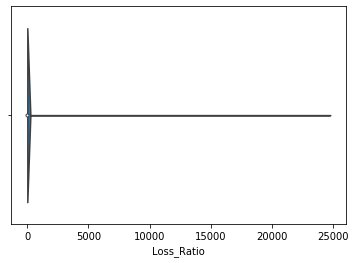

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.violinplot(x = "Loss_Ratio", data=df)

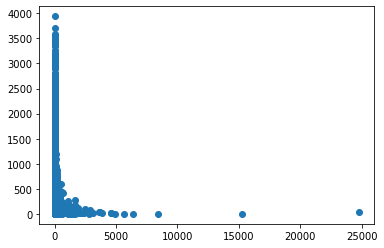

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

plt.scatter(df['Loss_Ratio'],df['Annual_Premium'])
plt.show()

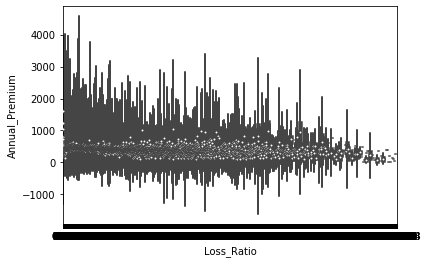

In [21]:

sns.violinplot(x = "Loss_Ratio", y="Annual_Premium", data=df)

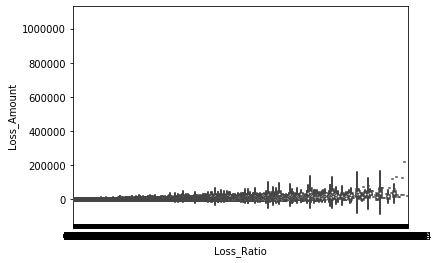

In [20]:
sns.violinplot(x = "Loss_Ratio", y="Loss_Amount", data=df)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424431 entries, 0 to 424430
Data columns (total 69 columns):
PolicyNo                                    424431 non-null int64
Policy_Company                              424431 non-null object
Policy_Installment_Term                     424431 non-null int64
Policy_Billing_Code                         424431 non-null object
Policy_Method_Of_Payment                    424431 non-null object
Policy_Reinstatement_Fee_Indicator          424431 non-null object
Policy_Zip_Code_Garaging_Location           424431 non-null object
Vehicle_Territory                           424431 non-null int64
Vehicle_Make_Year                           424431 non-null int64
Vehicle_Make_Description                    424431 non-null object
Vehicle_Performance                         424431 non-null object
Vehicle_New_Cost_Amount                     424431 non-null int64
Vehicle_Symbol                              424431 non-null int64
Vehicle_Number_Of_Driver

The object data types are categorical, the float/int are numerical datatypes